In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [3]:
%cd gdrive/MyDrive/web_attack_data_set

/content/gdrive/MyDrive/web_attack_data_set


In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_frame = pd.read_csv("final.csv")
data_frame.head()

,payload,category
0,"<del oncontextmenu=""alert(1)"">test</del>",xss
1,/%c0%2e%c0%2e/%c0%2e%c0%2e/%c0%2e%c0%2e/%c0%2e...,lfi-ldf
2,&#x003c;,xss
3,culminar,clean
4,moral3@fotoseroticas.com.ca,clean


In [ ]:
data_frame.isnull().any()

payload      True
category    False
dtype: bool

In [ ]:

data_frame.dropna(inplace=True)
data_frame.isnull().sum()

payload     0
category    0
dtype: int64

In [ ]:
X = data_frame["payload"].astype(str)
y = data_frame["category"].astype(str)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=555 , shuffle=True)


for index, row in data_frame.iterrows():
    print(row["payload"])
    if index > 10 :
        break

<del oncontextmenu="alert(1)">test</del>
/%c0%2e%c0%2e/%c0%2e%c0%2e/%c0%2e%c0%2e/%c0%2e%c0%2e/%c0%2e%c0%2e/%c0%2e%c0%2e/%c0%2e%c0%2e/
&#x003c;
culminar
moral3@fotoseroticas.com.ca
%2e%2e%uEFC8%2e%2e%uEFC8%2e%2e%uEFC8etc%uEFC8passwd
<font onpointerdown=alert(1)>XSS</font>
aier42et=7ea1m9n5d;ctst13=037537326;tae=<!--#email fromhost="www.ses1emkf.com" tohost="mailbox.yamn.com" message="bfns ohv7uug dtnaeoms gtey" fromaddress="sdehte.com" toaddress="qhriy.2iedut.com" subject="crt" sender="reg.com" replyto="veuoi.com" cc="es" inreplyto="ymo dut wt" id="aykmail" -->
<style>:target {transform: rotate(180deg);}</style><main id=x style="transition:transform 2s" ontransitionrun=alert(1)></main>
1')));if(7899=7899) select 7899 else drop function zbbp--
/heioogeiealrwt/echa0meimnehtd.pl
<del draggable="true" ondragleave="alert(1)">test</del>


In [ ]:
X.count()

111721

In [ ]:
# from keras import utils
# from keras.preprocessing.text import Tokenizer
# import numpy as np


# # TFIDF without gram

# t = Tokenizer(char_level=True, num_words=5200)

# XY = pd.concat([X_test, X_train], axis=0)
# t.fit_on_texts(XY)
# xt_train = t.texts_to_matrix(X_train,mode='tfidf')
# xt_test = t.texts_to_matrix(X_test,mode='tfidf')

# svc = SVC(C=10,kernel='rbf')
# svc_model = svc.fit(xt_train,y_train)



In [ ]:
# accuracy_score(y_test,svc_model.predict(xt_test))

In [ ]:
# from keras import utils
# from keras.preprocessing.text import Tokenizer
# import numpy as np

# t = Tokenizer(char_level=True, num_words=5200)
# XY = pd.concat([X_test, X_train], axis=0)
# t.fit_on_texts(XY)

# xt_train = t.texts_to_matrix(X_train,mode='freq')
# xt_test = t.texts_to_matrix(X_test,mode='freq')


In [ ]:
# xt_train

In [ ]:
# tmp = np.concatenate((xt_train,xt_test))

In [ ]:
# Rows - Total number of documents (train + test)
# Cols - Total number of words
#tmp.shape

In [ ]:
# freq_table = tmp.reshape(tmp.shape[1],-1)

In [ ]:
# freq_table.shape

In [ ]:
# class_freq

In [ ]:
# yt = np.concatenate((yy_train,yy_test))

In [ ]:
# data = freq_table.reshape(freq_table.shape[1],-1)

In [ ]:
# total = data.sum(axis = 1)

In [ ]:
# for idx,u in enumerate(data):
#   for idx2,z in enumerate(u):
#     data[idx][idx2] = float(MONO[idx2]*data[idx][idx2])/total[idx]

In [ ]:
# x_mono = data 
# y_mono = yt 

In [ ]:
# x_mono.shape,y_mono.shape

In [ ]:
# other frequency implementiation 
# from sklearn.feature_extraction.text import CountVectorizer
# import operator

# count_vec = CountVectorizer(input='content' , ngram_range=(1,2), lowercase=True  , analyzer='char')
# count_fit = count_vec.fit(X_train)
# count_features = count_fit.get_feature_names_out()
# count_list = count_vec.fit_transform(X_train).toarray().sum(axis=0)    

# feature_freq_dict = dict(zip(count_features,count_list))
# sorted_dict = sorted(feature_freq_dict.items(), key=operator.itemgetter(1))

# print(len(feature_freq_dict))

# print(sorted_dict)

In [ ]:
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier(max_iter=100)


pipe = Pipeline([
    ('tfidf' ,  TfidfVectorizer(input='content',lowercase=True , analyzer='char', max_features=1024)),
    #('SVC' , SVC())
    ('sgd' , sgd)
    ])

# {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’},
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2) , (1, 4)] ,
              #'SVC__kernel':('linear', 'rbf'), 'SVC__C':[1, 10]
              'sgd__loss' :  ["hinge", "log", "squared_hinge", "modified_huber"],
              "sgd__alpha" : [0.0001, 0.001, 0.01, 0.1],
              "sgd__penalty" : ["l2", "l1", "none"]
              }

grid_search = GridSearchCV(pipe, parameters, n_jobs=100 , cv=2,  verbose=4 )
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(analyzer='char',
                                                        max_features=1024)),
                                       ('sgd', SGDClassifier(max_iter=100))]),
             n_jobs=100,
             param_grid={'sgd__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'sgd__loss': ['hinge', 'log', 'squared_hinge',
                                       'modified_huber'],
                         'sgd__penalty': ['l2', 'l1', 'none'],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2),
                                                (1, 4)]},
             verbose=4)

In [ ]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))




Best score: 0.973
Best parameters set:
	sgd__alpha: 0.0001
	sgd__loss: 'hinge'
	sgd__penalty: 'none'
	tfidf__ngram_range: (1, 4)


In [ ]:
model_pipe = Pipeline([
    ('tfidf' ,  TfidfVectorizer(input='content', ngram_range=(1,2), lowercase=True , analyzer='char', max_features=1024)),
    ('SGD' , SGDClassifier(alpha=0.0001,penalty=None,loss='hinge'))
    ])

model_pipe.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1024,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [ ]:
with open("SGD_Best_Params_1024_Features.model", "wb") as f:
    pickle.dump(model_pipe , f)

In [ ]:
model_pipe.predict(X_test[30:60])

array(['rce', 'injection', 'injection', 'clean', 'lfi-ldf', 'clean',
       'injection', 'lfi-ldf', 'lfi-ldf', 'lfi-ldf', 'clean', 'lfi-ldf',
       'clean', 'lfi-ldf', 'injection', 'lfi-ldf', 'injection',
       'injection', 'lfi-ldf', 'clean', 'xss', 'injection', 'clean',
       'clean', 'lfi-ldf', 'clean', 'lfi-ldf', 'lfi-ldf', 'clean', 'xss'],
      dtype='<U12')

In [ ]:

accuracy_score(y_test,model_pipe.predict(X_test))


0.975385992392034

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    # from https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig


In [ ]:
predicted_y = model_pipe.predict(X_test)

cf_matrix = confusion_matrix(y_test , predicted_y)
print(cf_matrix)

[[7535    0    0   12   21    0   16   27    0]
 [   0   16    0    0    2    0    0    0    0]
 [   3    0    3    0    0    0    0    0    0]
 [  53    0    0 3202    5    0   20   11    0]
 [  73    0    0    1 6121    0    7    5    0]
 [   1    1    0    0    0   59    0    5    0]
 [  83    0    0   15   51    0  513   12    0]
 [  56    1    0   19    9    1   22 4340    3]
 [   0    0    0    0    0    0    1   14    6]]


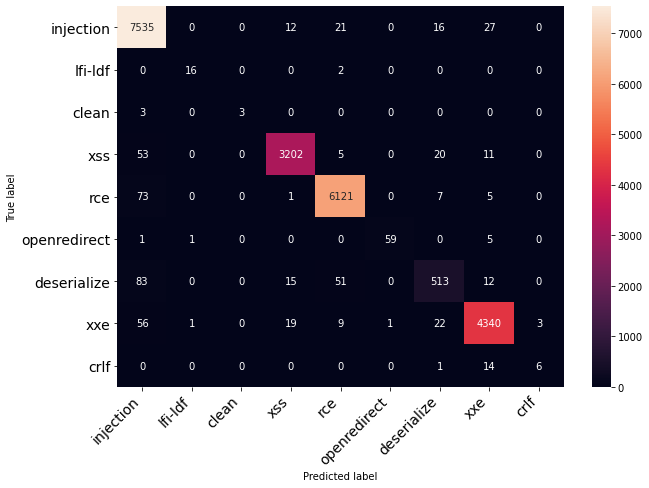

In [ ]:
labels = y_test.unique().tolist()
print_confusion_matrix(cf_matrix, class_names=labels);


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

       clean       0.97      0.99      0.98      7611
        crlf       0.89      0.89      0.89        18
 deserialize       1.00      0.50      0.67         6
   injection       0.99      0.97      0.98      3291
     lfi-ldf       0.99      0.99      0.99      6207
openredirect       0.98      0.89      0.94        66
         rce       0.89      0.76      0.82       674
         xss       0.98      0.98      0.98      4451
         xxe       0.67      0.29      0.40        21

    accuracy                           0.98     22345
   macro avg       0.93      0.81      0.85     22345
weighted avg       0.97      0.98      0.97     22345



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_pipe, X_train, y_train, cv=5)

In [ ]:
print(scores)

[0.97275677 0.97432168 0.97588811 0.97482517 0.97309091]


In [ ]:
 test_payloads = ["xss", "crlf", "xxe", "sqli", "injection", "lfi", "passwd", "etc", "onmouseover",
                                      "onload", "192.168.1.100:9887", "127.0.0.1", "10.255.255.255", "host", "localhost"
                                                                                                             "10.0.0.0",
                                      "172.31.255.255", "192.168.255.255", "192.168.0.0", "172.16.0.0", "wait", "count",
                                      "select", "google", "google.com", "www.google.com", "alert", "alert(1)"
                                                                                                   "bin", "bash",
                                      "curl", "where", "char", "exec", "cgi", "extractvalue", "1", "2", "3"
                                                                                                        "tftp",
                                      "192.168", "192.", "127.", "'", "<>",
                                      "<a>example.com</a>", "cmd", "<>@!@#$%^&*()_+", "<b>example.com<<>>@",
                                      "Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) "
                                      "Chrome/36.0.1985.125 Safari/537.36" , "../../etc/passwd" , "and 1=1--" , "<svg/onload=alert(0)"]
  

model_pipe.predict(test_payloads)  

array(['xss', 'clean', 'rce', 'lfi-ldf', 'clean', 'clean', 'lfi-ldf',
       'lfi-ldf', 'xss', 'xss', 'rce', 'clean', 'clean', 'clean', 'clean',
       'clean', 'clean', 'clean', 'openredirect', 'clean', 'clean',
       'injection', 'openredirect', 'openredirect', 'openredirect', 'xss',
       'xss', 'clean', 'clean', 'clean', 'clean', 'rce', 'clean', 'clean',
       'clean', 'clean', 'clean', 'clean', 'clean', 'clean', 'injection',
       'xss', 'xss', 'rce', 'xss', 'xss', 'clean', 'lfi-ldf', 'injection',
       'xss'], dtype='<U12')

In [ ]:
#make interesting clean payload 
# import re 

# from sklearn.feature_extraction.text import CountVectorizer

# count_vec = CountVectorizer(input='content' , lowercase=True , min_df=5,    stop_words='english' , analyzer='word')

# tf_idf = TfidfVectorizer(input='content',lowercase=True , ngram_range=(1,2) , analyzer='char' )

# count_features = count_vec.fit(X_train).get_feature_names() 

# tfid_features = tf_idf.fit(X_train).get_feature_names() 


# print(len(tfid_features))
# print(len(count_features))


# pattern = re.compile(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})')
 

# injected_clean_fq=["127.0.0.1"]
 
# for index, row in data_frame.iterrows():
#   if pattern.match(row["payload"]):
#                     injected_clean_fq.append((pattern.match(row["payload"]).group()))
     


# injected_clean_fq.append(tfid_features)
# injected_clean_fq.append(count_features)


# #make a copy 
# X_train_extra_clean = X_train 
# y_train_extra_clean = y_train 

# new = pd.list(["lol", "lol"]).astype('str')
# X_train_extra_clean.append(new)



In [ ]:
svc_pipe = Pipeline([
    ('tfidf' ,  TfidfVectorizer(input='content',lowercase=True , analyzer='char', max_features=1024)),
    ('SVC' , SVC())

    ])

# {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’},
parameters = {'tfidf__ngram_range': [ (1, 2) , (1,3) , (2,2), (1,4)] ,
              'SVC__kernel':('linear', 'rbf' ), 'SVC__C':[1, 10 , 100]
              }

grid_search = GridSearchCV(svc_pipe, parameters, n_jobs=-1 , cv=2,  verbose=4 )
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(analyzer='char',
                                                        max_features=1024)),
                                       ('SVC', SVC())]),
             n_jobs=40,
             param_grid={'SVC__C': [1, 10, 100],
                         'SVC__kernel': ('linear', 'rbf'),
                         'tfidf__ngram_range': [(1, 2), (1, 3), (2, 2),
                                                (1, 4)]},
             verbose=4)

In [ ]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Best score: 0.987
Best parameters set:
	SVC__C: 10
	SVC__kernel: 'rbf'
	tfidf__ngram_range: (1, 4)


In [ ]:
svc_pipe = Pipeline([
    ('tfidf' ,  TfidfVectorizer(input='content', ngram_range=(1,4), lowercase=True , analyzer='char', max_features=1024)),
    ('SGD' , SVC(kernel='rbf', C=10))
    ])

svc_pipe.fit(X_train, y_train)



Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', max_features=1024,
                                 ngram_range=(1, 4))),
                ('SGD', SVC(C=10))])

In [ ]:
accuracy_score(y_test,svc_pipe.predict(X_test))

0.9886775565003356

In [ ]:
svc_pipe = Pipeline([
    ('tfidf' ,  TfidfVectorizer(input='content', ngram_range=(1,2), lowercase=True , analyzer='char', max_features=5000)),
    ('SVC' , SVC(kernel='rbf', C=10))
    ])

svc_pipe.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', max_features=5000,
                                 ngram_range=(1, 2))),
                ('SVC', SVC(C=10))])

In [ ]:
accuracy_score(y_test,svc_pipe.predict(X_test))

0.9891698366524949

In [ ]:
predicted_y = svc_pipe.predict(X_test)

cf_matrix = confusion_matrix(y_test , predicted_y)
print(cf_matrix)

[[7601    0    0    2    1    0    0    7    0]
 [   0   18    0    0    0    0    0    0    0]
 [   0    0    6    0    0    0    0    0    0]
 [  39    0    0 3236    0    0   11    5    0]
 [  22    0    0    0 6178    0    6    1    0]
 [   0    0    0    0    0   63    0    3    0]
 [  19    0    0    4   23    0  603   25    0]
 [  33    0    0    7    2    0   14 4388    7]
 [   0    0    0    0    0    0    0   11   10]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

       clean       0.97      0.99      0.98      7611
        crlf       0.89      0.89      0.89        18
 deserialize       1.00      0.50      0.67         6
   injection       0.99      0.97      0.98      3291
     lfi-ldf       0.99      0.99      0.99      6207
openredirect       0.98      0.89      0.94        66
         rce       0.89      0.76      0.82       674
         xss       0.98      0.98      0.98      4451
         xxe       0.67      0.29      0.40        21

    accuracy                           0.98     22345
   macro avg       0.93      0.81      0.85     22345
weighted avg       0.97      0.98      0.97     22345



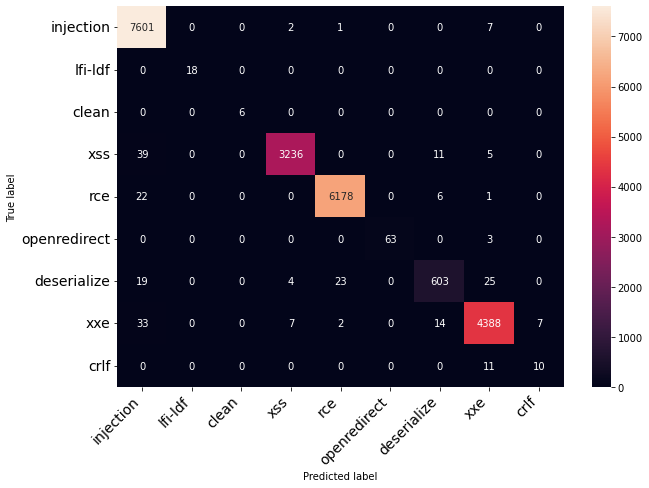

In [ ]:
labels = y_test.unique().tolist()
print_confusion_matrix(cf_matrix, class_names=labels);

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV

# random_grid = {'rf__bootstrap': [True, False],
#  'rf__max_depth': [10, 20, 30, None],
#  'rf__max_features': ['auto', 'sqrt'],
#  'rf__min_samples_leaf': [1, 2, 4],
#  'rf__min_samples_split': [2, 5, 10],
#  'rf__n_estimators': [200, 400, 600],
#  'tfidf__ngram_range': [ (1, 2)] 
#  }


# rf = RandomForestRegressor()

# rf_pipe = Pipeline([
#     ('tfidf' ,  TfidfVectorizer(input='content',lowercase=True , analyzer='char', max_features=1024)),
#     ('rf' , rf)

#     ])


# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# zz = le.fit_transform(y_train)
# yy_train = zz

# dd = le.fit_transform(y_test)
# yy_test = dd

# rf_random = RandomizedSearchCV(rf_pipe, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=4 , n_jobs = -1)
# rf_random.fit(X_train, yy_train)

In [ ]:


rf_model_pipe_default = Pipeline([
    ('tfidf' ,  TfidfVectorizer(input='content',lowercase=True , ngram_range=(1,2), analyzer='char', max_features=1024)),
    ('RF' , RandomForestClassifier())
    ])

rf_model_pipe_default.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1024,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
accuracy_score(y_test,rf_model_pipe_default.predict(X_test))


0.9833072275676885

In [ ]:
predicted_y = rf_model_pipe_default.predict(X_test)

cf_matrix = confusion_matrix(y_test , predicted_y)
print(cf_matrix)

[[7602    0    0    2    0    0    0    7    0]
 [   0   18    0    0    0    0    0    0    0]
 [   0    0    6    0    0    0    0    0    0]
 [  46    0    0 3229    1    0   11    2    2]
 [  74    0    0    0 6122    0   10    1    0]
 [   1    0    0    0    0   62    0    3    0]
 [  47    0    0   14   24    0  563   26    0]
 [  64    0    0    3    0    0   13 4364    7]
 [   0    0    0    0    0    0    0   15    6]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

       clean       0.97      1.00      0.98      7611
        crlf       1.00      1.00      1.00        18
 deserialize       1.00      1.00      1.00         6
   injection       0.99      0.98      0.99      3291
     lfi-ldf       1.00      0.99      0.99      6207
openredirect       1.00      0.94      0.97        66
         rce       0.94      0.84      0.89       674
         xss       0.99      0.98      0.98      4451
         xxe       0.40      0.29      0.33        21

    accuracy                           0.98     22345
   macro avg       0.92      0.89      0.90     22345
weighted avg       0.98      0.98      0.98     22345



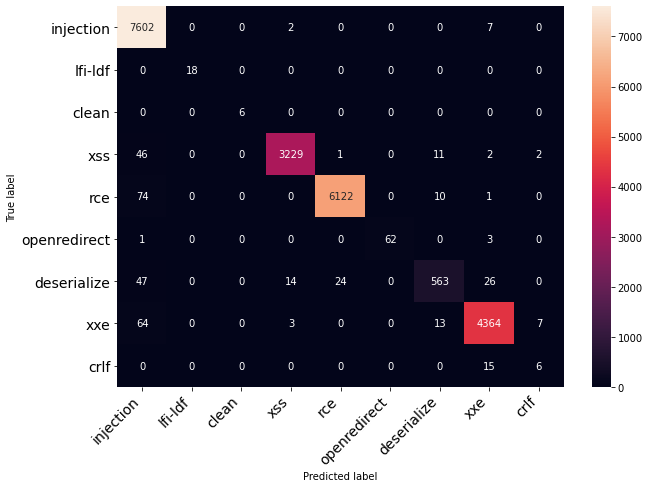

In [ ]:
labels = y_test.unique().tolist()
print_confusion_matrix(cf_matrix, class_names=labels);

In [ ]:
 test_payloads = ["xss", "crlf", "xxe", "sqli", "injection", "lfi", "passwd", "etc", "onmouseover",
                                      "onload", "192.168.1.100:9887", "127.0.0.1", "10.255.255.255", "host", "localhost"
                                                                                                             "10.0.0.0",
                                      "172.31.255.255", "192.168.255.255", "192.168.0.0", "172.16.0.0", "wait", "count",
                                      "select", "google", "google.com", "www.google.com", "alert", "alert(1)"
                                                                                                   "bin", "bash",
                                      "curl", "where", "char", "exec", "cgi", "extractvalue", "1", "2", "3"
                                                                                                        "tftp",
                                      "192.168", "192.", "127.", "'", "<>",
                                      "<a>example.com</a>", "cmd", "<>@!@#$%^&*()_+", "<b>example.com<<>>@",
                                      "Mozilla/5.0 (X11; OpenBSD i386) AppleWebKit/537.36 (KHTML, like Gecko) "
                                      "Chrome/36.0.1985.125 Safari/537.36" , "../../etc/passwd" , "and 1=1--" , "<svg/onload=alert(0)"]
  

rf_model_pipe_default.predict(test_payloads)  

array(['clean', 'clean', 'clean', 'clean', 'clean', 'clean', 'lfi-ldf',
       'clean', 'xss', 'xss', 'clean', 'clean', 'clean', 'clean', 'clean',
       'clean', 'clean', 'clean', 'clean', 'clean', 'clean', 'injection',
       'clean', 'openredirect', 'openredirect', 'clean', 'xss', 'clean',
       'clean', 'clean', 'clean', 'clean', 'clean', 'clean', 'injection',
       'clean', 'clean', 'clean', 'clean', 'clean', 'injection', 'xss',
       'xss', 'clean', 'xss', 'xss', 'clean', 'lfi-ldf', 'injection',
       'xss'], dtype=object)

In [ ]:
with open("RF_Default_Params_1024_Features.model", "wb") as f:
    pickle.dump(rf_model_pipe_default , f)